In [1]:
pip install sqlite3

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3


In [2]:
import sqlite3
import pandas as pd

# 1. Conectar SQL desde y Python y crear tablas

In [3]:
# Conectar a la base de datos o crearla si no existe
conn = sqlite3.connect('Rappi_bases.db')

# Crear un cursor((UN PANA, un/a parcero/a, un/a amigazo/a )) para ejecutar consultas SQL
el_pana = conn.cursor()

# Consulta SQL para crear una tabla (base)
#NOTA IMPORTANTE: Cuádo tu quieres que tu string pueda ser de varias filas (como abajo) debes abrir 3 comillas
query = """ 
CREATE TABLE IF NOT EXISTS domiciliarios (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    nombre TEXT NOT NULL,
    edad INTEGER
    status BOOL
);
"""

# Ejecutar la consulta para crear la tabla
el_pana.execute(query)

# Guardar los cambios y cerrar la conexión
conn.commit() #Guardar
conn.close() #cerrar

In [4]:
# Conectar a la base de datos o crearla si no existe
conn = sqlite3.connect('Rappi_bases.db')

# Crear un cursor((UN PANA, un/a parcero/a, un/a amigazo/a )) para ejecutar consultas SQL
el_pana = conn.cursor()

# Consulta SQL para crear una tabla (base)
query = """
CREATE TABLE IF NOT EXISTS clientes (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    nombre TEXT NOT NULL,
    edad INTEGER
    prime BOOL
    direccion TEXT
);
"""

# Ejecutar la consulta para crear la tabla
el_pana.execute(query)


# Consulta SQL para crear una tabla (base)
query = """
CREATE TABLE IF NOT EXISTS domicilios (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    restaurante TEXT NOT NULL,
    peoducto1 INTEGER
    producto2 INTEGER
    producto3 INTEGER
);
"""

# Ejecutar la consulta para crear la tabla
el_pana.execute(query)
# Guardar los cambios y cerrar la conexión
conn.commit() #Guardar
conn.close() #cerrar

Info re-ayudadora:

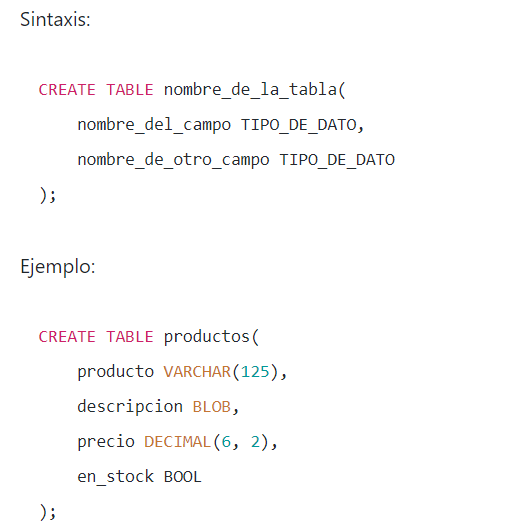

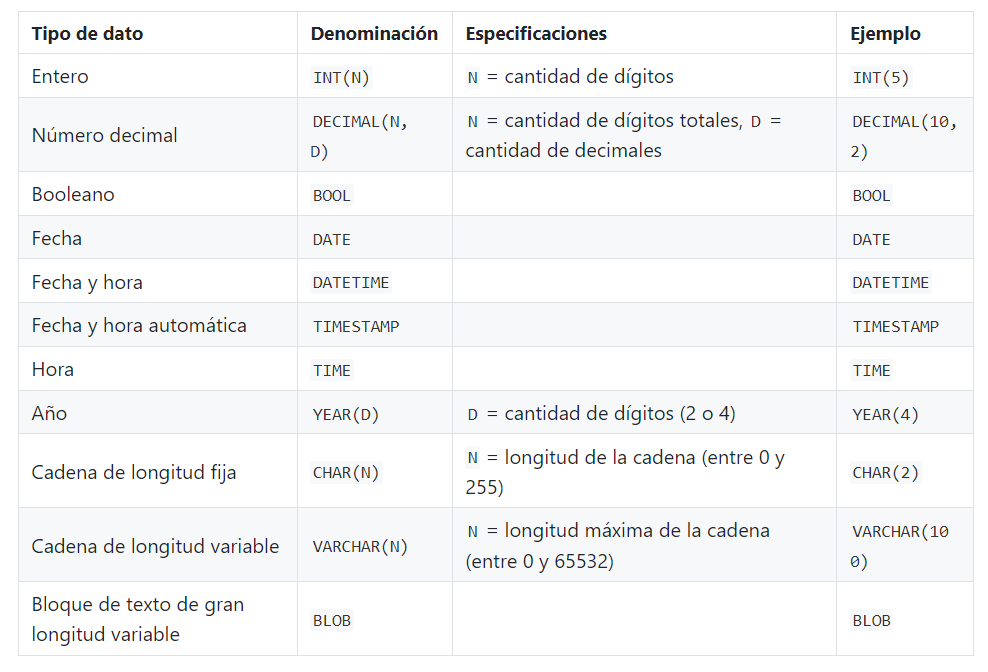

Explicación de cada parte del query:

CREATE TABLE: Es una instrucción SQL que indica la creación de una nueva tabla.

IF NOT EXISTS: Esta cláusula es opcional y se utiliza para verificar si la tabla ya existe en la base de datos. Si la tabla ya existe, la instrucción no hace nada y evita errores.

domiciliarios: Es el nombre de la tabla que se está creando.

(...): Los paréntesis contienen las definiciones de las columnas de la tabla. Cada columna se define con un nombre, un tipo de dato y restricciones adicionales si las hubiera.

id INTEGER PRIMARY KEY AUTOINCREMENT: La columna "id" es de tipo entero (INTEGER) y es la clave primaria (PRIMARY KEY) de la tabla. La clave primaria es un identificador único para cada fila de la tabla. La palabra clave AUTOINCREMENT indica que el valor de "id" se incrementará automáticamente cada vez que se inserte una nueva fila en la tabla.

nombre TEXT NOT NULL: La columna "nombre" es de tipo texto (TEXT) y se indica que no puede ser nula (NOT NULL), lo que significa que siempre debe tener un valor cuando se inserta una nueva fila.

edad INTEGER: La columna "edad" es de tipo entero (INTEGER), pero no tiene restricciones adicionales, lo que significa que puede ser nula.

Al ejecutar este query, la base de datos crea una tabla llamada "domiciliarios" con las columnas "id", "nombre" y "edad", siguiendo las definiciones y restricciones especificadas.

In [5]:
###¿cómo saber cuántas bases hay?


# Conectar a la base de datos
conn = sqlite3.connect('Rappi_bases.db')  # reemplaza con tu ruta de archivo de base de datos

# Crear un objeto cursor
cur = conn.cursor()

# Obtener una lista de todas las tablas
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Recuperar los resultados
tablas = cur.fetchall()

# Imprimir los nombres de tabla
for tabla in tablas:
    print(tabla[0])  # Cada ítem en 'tablas' es una tupla, el nombre de la tabla es el primer elemento

# Cerrar la conexión
conn.close()


domiciliarios
sqlite_sequence
clientes
domicilios


# 2. Insertar información

Información re ayudadora:

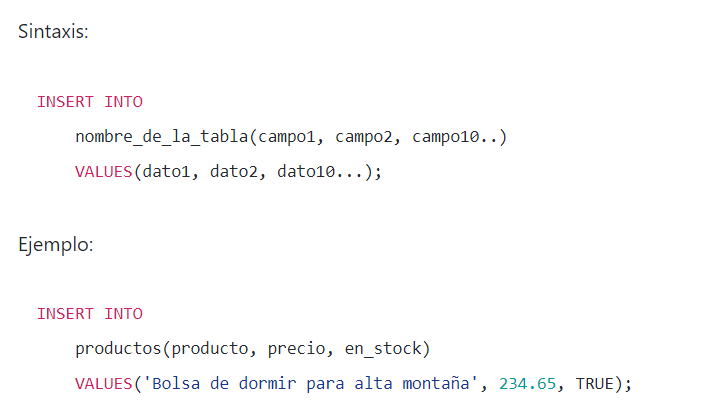

In [6]:
# Conectar a la base de datos
conn = sqlite3.connect('Rappi_bases.db')
cursor = conn.cursor()

cursor.execute("INSERT INTO domiciliarios (nombre, edad) VALUES (?, ?)", ("Andrés", 20))
conn.commit()


Lo mismo de arriba pero en función

In [7]:
# INSERT básico: Insertar datos en la tabla domiciliarios
def insert_domiciliario(nombre, edad):
    cursor.execute("INSERT INTO domiciliarios (nombre, edad) VALUES (?, ?)", (nombre, edad))
    conn.commit()


#EJECUTO LA FUNCIÓN    
    
# INSERT básico
insert_domiciliario("María", 22)


In [8]:
# INSERT múltiple: Insertar varios registros al mismo tiempo
def insert_domiciliarios_varios(domiciliarios):
    cursor.executemany("INSERT INTO domiciliarios (nombre, edad) VALUES (?, ?)", domiciliarios)
    conn.commit()


# INSERT múltiple
domiciliarios = [
    ("Sofía", 19),
    ("Manuel", 21),
    ("Carmen", 23)
]
insert_domiciliarios_varios(domiciliarios)


In [9]:
# INSERT con columna específica: Insertar datos solo en la columna 'nombre' y dejar 'edad' como NULL
def insert_domiciliario_nombre(nombre):
    cursor.execute("INSERT INTO domiciliarios (nombre) VALUES (?)", (nombre,))
    conn.commit()

# INSERT con columna específica
insert_domiciliario_nombre("Daniel")

# Cerrar la conexión a la base de datos
conn.close()


¿Cómo ver el resultado?

In [10]:
# Para reabrir la conexión, vuelves a conectarte a la base de datos
conn = sqlite3.connect('Rappi_bases.db')

# Ahora puedes proceder a realizar más operaciones, como ejecutar consultas, etc.
cursor = conn.cursor()

# Consulta para obtener todos los datos de la tabla 'domiciliarios'
query = "SELECT * FROM domiciliarios;"#SELECT SE EXPLICA EN LA SIGUIENTE SECCIÓN

# Utilizar pandas para leer la consulta SQL y almacenar los resultados en un DataFrame
df = pd.read_sql_query(query, conn)

# Cerrar la conexión
conn.close()

# Mostrar el DataFrame (los primeros 10 resultados)
df.head(10)

,id,nombre,edad
0,3,Sofía,19.0
1,6,Daniel,NaN
2,7,Andrés,20.0
3,8,María,22.0
4,9,Sofía,19.0
5,10,Manuel,21.0
6,11,Carmen,23.0
7,12,Daniel,NaN
8,13,Andrés,20.0
9,14,María,22.0


# 3. SELECT (FILTRAR)

In [11]:
import sqlite3

# Conectar a la base de datos
conn = sqlite3.connect('Rappi_bases.db')
cursor = conn.cursor()


cursor.execute("SELECT * FROM domiciliarios")
domiciliarios = cursor.fetchall()
for persona in domiciliarios:
    print(persona)


(3, 'Sofía', 19)
(6, 'Daniel', None)
(7, 'Andrés', 20)
(8, 'María', 22)
(9, 'Sofía', 19)
(10, 'Manuel', 21)
(11, 'Carmen', 23)
(12, 'Daniel', None)


In [12]:
# SELECT con filtro: Leer domiciliarios con edad mayor a un valor específico
def select_domiciliarios_edad_mayor(edad):
    cursor.execute("SELECT * FROM domiciliarios WHERE edad > ?", (edad,))
    domiciliarios = cursor.fetchall()
    for persona in domiciliarios:
        print(persona)

print("\ndomiciliarios con edad mayor a 20:")
select_domiciliarios_edad_mayor(20)




domiciliarios con edad mayor a 20:
(2, 'María', 22)
(4, 'Manuel', 21)
(5, 'Carmen', 23)


In [13]:
# SELECT con ordenamiento: Leer domiciliarios ordenados por edad de forma descendente
def select_domiciliarios_orden_edad_desc():
    cursor.execute("SELECT * FROM domiciliarios ORDER BY edad DESC")
    domiciliarios = cursor.fetchall()
    for persona in domiciliarios:
        print(persona)

print("\ndomiciliarios ordenados por edad descendente:")
select_domiciliarios_orden_edad_desc()


domiciliarios ordenados por edad descendente:
(5, 'Carmen', 23)
(2, 'María', 22)
(4, 'Manuel', 21)
(1, 'Andrés', 20)
(3, 'Sofía', 19)
(6, 'Daniel', None)


In [14]:

# SELECT con límite: Leer solo los primeros 3 domiciliarios
def select_domiciliarios_limite():
    cursor.execute("SELECT * FROM domiciliarios LIMIT 3")
    domiciliarios = cursor.fetchall()
    for persona in domiciliarios:
        print(persona)



print("\nPrimeros 3 domiciliarios:")
select_domiciliarios_limite()





Primeros 3 domiciliarios:
(1, 'Andrés', 20)
(2, 'María', 22)
(3, 'Sofía', 19)


In [15]:
# SELECT con agregación: Calcular el promedio de edad de los domiciliarios
def select_promedio_edad():
    cursor.execute("SELECT AVG(edad) FROM domiciliarios")
    promedio_edad = cursor.fetchone()[0]
    print(f"Promedio de edad: {promedio_edad}")

print("\nPromedio de edad de los domiciliarios:")
select_promedio_edad()




Promedio de edad de los domiciliarios:
Promedio de edad: 21.0


In [16]:

# Cerrar la conexión a la base de datos
conn.close()

Información re-ayudadora

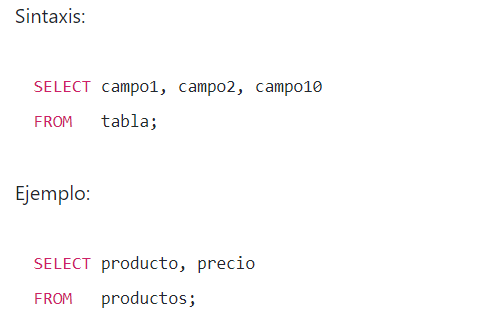

# 4. UPDATE

In [17]:
# Conectar a la base de datos
conn = sqlite3.connect('Rappi_bases.db')
cursor = conn.cursor()

# UPDATE básico: Actualizar la edad de un domiciliario por su ID
def update_domiciliario_edad(id, nueva_edad):
    cursor.execute("UPDATE domiciliarios SET edad = ? WHERE id = ?", (nueva_edad, id))
    conn.commit()

# UPDATE con consulta SQL en una variable
def update_domiciliario_edad_v2(id, nueva_edad):
    query = "UPDATE domiciliarios SET edad = ? WHERE id = ?"
    cursor.execute(query, (nueva_edad, id))
    conn.commit()

# UPDATE con condición adicional: Actualizar la edad de los domiciliarios solo si su edad actual es mayor que un valor específico
def update_domiciliarios_edad_mayor(edad_actual, nueva_edad):
    cursor.execute("UPDATE domiciliarios SET edad = ? WHERE edad > ?", (nueva_edad, edad_actual))
    conn.commit()

# Función para mostrar domiciliarios
def select_domiciliarios():
    cursor.execute("SELECT * FROM domiciliarios")
    domiciliarios = cursor.fetchall()
    for domiciliario in domiciliarios:
        print(domiciliario)

# Ejecutar las funciones de UPDATE
print("domiciliarios antes de actualizar:")
select_domiciliarios()

print("\nActualizar la edad del domiciliario con ID 1 a 25:")
update_domiciliario_edad(1, 25)
select_domiciliarios()

print("\nActualizar la edad del domiciliario con ID 2 a 22 usando una variable para la consulta SQL:")
update_domiciliario_edad_v2(2, 22)
select_domiciliarios()

print("\nActualizar la edad de los domiciliarios con edad mayor a 20 a 30:")
update_domiciliarios_edad_mayor(20, 30)
select_domiciliarios()

# Cerrar la conexión a la base de datos
conn.close()


domiciliarios antes de actualizar:
(1, 'Andrés', 20)
(2, 'María', 22)
(3, 'Sofía', 19)
(4, 'Manuel', 21)
(5, 'Carmen', 23)
(6, 'Daniel', None)

Actualizar la edad del domiciliario con ID 1 a 25:
(1, 'Andrés', 25)
(2, 'María', 22)
(3, 'Sofía', 19)
(4, 'Manuel', 21)
(5, 'Carmen', 23)
(6, 'Daniel', None)

Actualizar la edad del domiciliario con ID 2 a 22 usando una variable para la consulta SQL:
(1, 'Andrés', 25)
(2, 'María', 22)
(3, 'Sofía', 19)
(4, 'Manuel', 21)
(5, 'Carmen', 23)
(6, 'Daniel', None)

Actualizar la edad de los domiciliarios con edad mayor a 20 a 30:
(1, 'Andrés', 30)
(2, 'María', 30)
(3, 'Sofía', 19)
(4, 'Manuel', 30)
(5, 'Carmen', 30)
(6, 'Daniel', None)


Información re ayudadora:

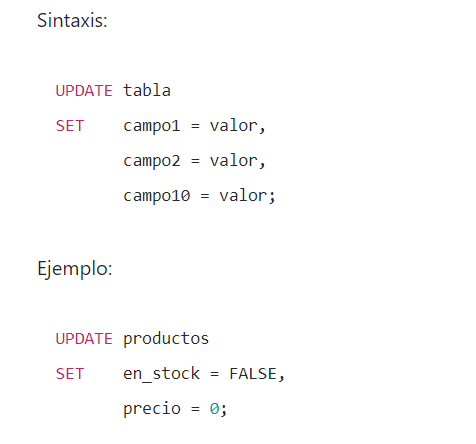

# 5. DELETE 

In [18]:
import sqlite3

# Conectar a la base de datos
conn = sqlite3.connect('Rappi_bases.db')
cursor = conn.cursor()

# DELETE básico: Eliminar un domiciliario por su ID
def delete_domiciliario(id):
    cursor.execute("DELETE FROM domiciliarios WHERE id = ?", (id,))
    conn.commit()

# DELETE con consulta SQL en una variable
def delete_domiciliario_v2(id):
    query = "DELETE FROM domiciliarios WHERE id = ?"
    cursor.execute(query, (id,))
    conn.commit()

# DELETE con condición: Eliminar domiciliarios con edad mayor a un valor específico
def delete_domiciliarios_edad_mayor(edad):
    cursor.execute("DELETE FROM domiciliarios WHERE edad > ?", (edad,))
    conn.commit()

# Función para mostrar domiciliarios
def select_domiciliarios():
    cursor.execute("SELECT * FROM domiciliarios")
    domiciliarios = cursor.fetchall()
    for domiciliario in domiciliarios:
        print(domiciliario)

# Ejecutar las funciones de DELETE
print("domiciliarios antes de eliminar:")
select_domiciliarios()

print("\nEliminar el domiciliario con ID 1:")
delete_domiciliario(1)
select_domiciliarios()

print("\nEliminar el domiciliario con ID 2 usando una variable para la consulta SQL:")
delete_domiciliario_v2(2)
select_domiciliarios()

print("\nEliminar domiciliarios con edad mayor a 25:")
delete_domiciliarios_edad_mayor(25)
select_domiciliarios()

# Cerrar la conexión a la base de datos
conn.close()


domiciliarios antes de eliminar:
(1, 'Andrés', 30)
(2, 'María', 30)
(3, 'Sofía', 19)
(4, 'Manuel', 30)
(5, 'Carmen', 30)
(6, 'Daniel', None)

Eliminar el domiciliario con ID 1:
(2, 'María', 30)
(3, 'Sofía', 19)
(4, 'Manuel', 30)
(5, 'Carmen', 30)
(6, 'Daniel', None)

Eliminar el domiciliario con ID 2 usando una variable para la consulta SQL:
(3, 'Sofía', 19)
(4, 'Manuel', 30)
(5, 'Carmen', 30)
(6, 'Daniel', None)

Eliminar domiciliarios con edad mayor a 25:
(3, 'Sofía', 19)
(6, 'Daniel', None)


Información re ayudadora:

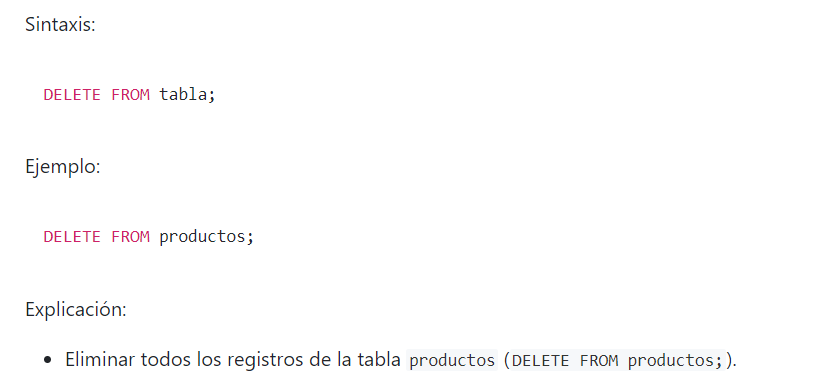

# Ver la base

In [19]:
def select_domiciliarios_pandas():
    conn = sqlite3.connect('Rappi_bases.db')
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM domiciliarios")
    domiciliarios = cursor.fetchall()
    global df # para que la base exista fuera de la funcion
    df = pd.DataFrame(domiciliarios, columns=[desc[0] for desc in cursor.description])
    conn.close()
    print(df)
    

In [20]:
select_domiciliarios_pandas()

   id  nombre  edad
0   3   Sofía  19.0
1   6  Daniel   NaN


In [21]:
df

,id,nombre,edad
0,3,Sofía,19.0
1,6,Daniel,NaN
